# Pandas统计分析基础（1）

Pandas 是 Python 的核心数据分析支持库，提供了快速、灵活、明确的数据结构，旨在简单、直观地处理关系型、标记型数据。

Pandas 适用于处理以下类型的数据：
- 与 SQL 或 Excel 表类似的，含异构列的表格数据;
- 有序和无序（非固定频率）的时间序列数据;
- 带行列标签的矩阵数据，包括同构或异构型数据;
- 任意其它形式的观测、统计数据集, 数据转入 Pandas 数据结构时不必事先标记。

Pandas 的主要数据结构是 Series（一维数据）与 DataFrame（二维数据），这两种数据结构足以处理金融、统计、社会科学、工程等领域里的大多数典型用例。对于 R 用户，DataFrame 提供了比 R 语言 data.frame 更丰富的功能。Pandas 基于 NumPy 开发，可以与其它第三方科学计算支持库完美集成。

## 1.安装

- 安装Pandas的最简单方法是将其安装为Anaconda发行版的一部分，这是一种用于数据分析和科学计算的跨平台发行版。这是大多数用户的推荐安装方法。
- pip install Pandas

**需要注意：**

- pandas新版已经不再支持python2
- pandas依赖numpy

In [1]:
import pandas as pd

In [2]:
print(pd.__version__) #看看自己的版本，过低的话可能会有些功能不支持

1.1.3


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #图中字体改为黑体以兼容中文
plt.rcParams['axes.unicode_minus']=False #负号显示的问题


## 2.Pandas引入的新数据类型：Series与 DataFrame

### 2.1 Series（一维数据）

Series 是带标签的一维数组，可存储整数、浮点数、字符串、Python 对象等类型的数据。轴标签统称为索引。调用 pd.Series 函数即可创建 Series：

s = pd.Series(data, index=index)

上述代码中，data 支持以下数据类型：

- Python 字典
- 数组
- 标量值（如，5）

index 是轴标签列表。不同数据可分为以下几种情况：

**（1）数组**

data 是数组时，index 长度必须与 data 长度一致。没有指定 index 参数时，创建数值型索引，即 [0, ..., len(data) - 1]。

In [4]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [5]:
s

a   -0.497889
b   -0.151760
c   -0.973079
d    0.035167
e    1.552054
dtype: float64

In [6]:
s.index #可以通过.index调用一个Series的index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

**（2）字典**

Series 可以用字典实例化：

In [7]:
dic = {'b': 1, 'a': 0, 'c': 2}

In [8]:
pd.Series(dic)

b    1
a    0
c    2
dtype: int64

**（3）标量值**

data 是标量值时，必须提供索引。Series 按索引长度重复该标量值。

In [9]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

### 2.2 DataFrame（二维数据）

DataFrame 是由多种类型的列构成的二维标签数据结构，类似于 Excel 、SQL 表，或 Series 对象构成的字典。DataFrame 是最常用的 Pandas 对象，与 Series 一样，DataFrame 支持多种类型的输入数据：

- 一维 ndarray、列表、字典、Series 字典
- 二维 numpy.ndarray
- Series
- DataFrame

除了数据，还可以有选择地传递 index（行标签）和 columns（列标签）参数。传递了索引或列，就可以确保生成的 DataFrame 里包含索引或列。Series 字典加上指定索引时，会丢弃与传递的索引不匹配的所有数据。

没有传递轴标签时，按常规依据输入数据进行构建。

**（1）用 Series 字典生成 DataFrame**

生成的索引是每个 Series 索引的并集。先把嵌套字典转换为 Series。如果没有指定列，DataFrame 的列就是字典键的有序列表。

In [10]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [11]:
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [13]:
df = pd.DataFrame(d) #大小写敏感

In [14]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [15]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


通过字典组成dataframe时，index一样的serie会共用index，否则会将不同的index拼接起来

In [16]:
pd.DataFrame(d, index=['d', 'b', 'a','c'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN
c,3.0,NaN


index 和 columns 属性分别用于访问行、列标签：

In [17]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [18]:
df.columns

Index(['one', 'two'], dtype='object')

**(2)用多维数组字典、列表字典生成 DataFrame**

多维数组的长度必须相同。如果传递了索引参数，index 的长度必须与数组一致。如果没有传递索引参数，生成的结果是 range(n)，n 为数组长度。

In [19]:
d = {'one': [1., 2., 3., 4.],'two': [4., 3., 2., 1.]}

In [20]:
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [21]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [24]:
c=pd.DataFrame(d)
c.index=['a', 'b', 'c', 'd']
c

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [22]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


## 3.数据的读写

### 3.1 读写csv：pd.read_csv和pd.DataFrame.to_csv

注意区分pandas和numpy在读写csv方面的区别

In [25]:
gdp_np=np.loadtxt('GDP.csv',delimiter=',')
print(gdp_np)

ValueError: could not convert string to float: ''

In [26]:
gdp_np=np.loadtxt('GDP.csv',delimiter=',',dtype='str')
print(gdp_np)

[['' '北京市' '天津市' '河北省' '山西省' '内蒙古自治区' '辽宁省' '吉林省' '黑龙江省' '上海市' '江苏省'
  '浙江省' '安徽省' '福建省' '江西省' '山东省' '河南省' '湖北省' '湖南省' '广东省' '广西壮族自治区' '海南省'
  '重庆市' '四川省' '贵州省' '云南省' '西藏自治区' '陕西省' '甘肃省' '青海省' '宁夏回族自治区' '新疆维吾尔自治区']
 ['2018年' '30319.98' '18809.64' '36010.27' '16818.11' '17289.22'
  '25315.35' '15074.62' '16361.62' '32679.87' '92595.4' '56197.15'
  '30006.82' '35804.04' '21984.78' '76469.67' '48055.86' '39366.55'
  '36425.78' '97277.77' '20352.51' '4832.05' '20363.19' '40678.13'
  '14806.45' '17881.12' '1477.63' '24438.32' '8246.07' '2865.23'
  '3705.18' '12199.08']
 ['2017年' '28014.94' '18549.19' '34016.32' '15528.42' '16096.21'
  '23409.24' '14944.53' '15902.68' '30632.99' '85869.76' '51768.26'
  '27018' '32182.09' '20006.31' '72634.15' '44552.83' '35478.09'
  '33902.96' '89705.23' '18523.26' '4462.54' '19424.73' '36980.22'
  '13540.83' '16376.34' '1310.92' '21898.81' '7459.9' '2624.83' '3443.56'
  '10881.96']
 ['2016年' '25669.13' '17885.39' '32070.45' '13050.41' '18128.1' '22246.9'
  

**注意：numpy在读csv时，是将csv读作一个数组，数组要求其中的每一个元素都是相同的数据类型。因此，当有文字内容时，得读作str类型**

In [27]:
gdp_pd=pd.read_csv('GDP.csv')
print(gdp_pd)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

In [29]:
gdp_pd=pd.read_csv('GDP.csv',encoding='gbk')
gdp_pd

,Unnamed: 0,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2018年,30319.98,18809.64,36010.27,16818.11,17289.22,25315.35,15074.62,16361.62,32679.87,...,20363.19,40678.13,14806.45,17881.12,1477.63,24438.32,8246.07,2865.23,3705.18,12199.08
1,2017年,28014.94,18549.19,34016.32,15528.42,16096.21,23409.24,14944.53,15902.68,30632.99,...,19424.73,36980.22,13540.83,16376.34,1310.92,21898.81,7459.90,2624.83,3443.56,10881.96
2,2016年,25669.13,17885.39,32070.45,13050.41,18128.10,22246.90,14776.80,15386.09,28178.65,...,17740.59,32934.54,11776.73,14788.42,1151.41,19399.59,7200.37,2572.49,3168.59,9649.70
3,2015年,23014.59,16538.19,29806.11,12766.49,17831.51,28669.02,14063.13,15083.67,25123.45,...,15717.27,30053.10,10502.56,13619.17,1026.39,18021.86,6790.32,2417.05,2911.77,9324.80
4,2014年,21330.83,15726.93,29421.15,12761.49,17770.19,28626.58,13803.14,15039.38,23567.70,...,14262.60,28536.66,9266.39,12814.59,920.83,17689.94,6836.82,2303.32,2752.10,9273.46
5,2013年,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84
6,2012年,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
7,2011年,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
8,2010年,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
9,2009年,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05


In [30]:
gdp_pd.index

RangeIndex(start=0, stop=19, step=1)

默认情况下，会自动生成index，从0开始的数字

如果csv里有填好的index，可以通过index_col参数指定

In [31]:
gdp_pd=pd.read_csv('GDP.csv',encoding='gbk',index_col=0)
gdp_pd

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2018年,30319.98,18809.64,36010.27,16818.11,17289.22,25315.35,15074.62,16361.62,32679.87,92595.40,...,20363.19,40678.13,14806.45,17881.12,1477.63,24438.32,8246.07,2865.23,3705.18,12199.08
2017年,28014.94,18549.19,34016.32,15528.42,16096.21,23409.24,14944.53,15902.68,30632.99,85869.76,...,19424.73,36980.22,13540.83,16376.34,1310.92,21898.81,7459.90,2624.83,3443.56,10881.96
2016年,25669.13,17885.39,32070.45,13050.41,18128.10,22246.90,14776.80,15386.09,28178.65,77388.28,...,17740.59,32934.54,11776.73,14788.42,1151.41,19399.59,7200.37,2572.49,3168.59,9649.70
2015年,23014.59,16538.19,29806.11,12766.49,17831.51,28669.02,14063.13,15083.67,25123.45,70116.38,...,15717.27,30053.10,10502.56,13619.17,1026.39,18021.86,6790.32,2417.05,2911.77,9324.80
2014年,21330.83,15726.93,29421.15,12761.49,17770.19,28626.58,13803.14,15039.38,23567.70,65088.32,...,14262.60,28536.66,9266.39,12814.59,920.83,17689.94,6836.82,2303.32,2752.10,9273.46
2013年,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,59753.37,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84
2012年,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,54058.22,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
2011年,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,49110.27,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
2010年,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,41425.48,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
2009年,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,34457.30,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05


In [32]:
gdp_pd.index

Index(['2018年', '2017年', '2016年', '2015年', '2014年', '2013年', '2012年', '2011年',
       '2010年', '2009年', '2008年', '2007年', '2006年', '2005年', '2004年', '2003年',
       '2002年', '2001年', '2000年'],
      dtype='object')

In [33]:
gdp_pd.to_csv('another_gdp.csv') #默认会保存行名和列名

**注意：默认保存的编码是utf-8，但excel读取的默认编码是gbk，所以会出现乱码。可以在保存时指定编码解决。**

In [34]:
gdp_pd.to_csv('another_gdp.csv',encoding='gbk') #默认会保存行名和列名

注意：只有Dataframe对象才有to_csv这个功能，ndarray不可以

In [35]:
print(type(gdp_np),type(gdp_pd))

<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [36]:
gdp_np.to_csv('another_gdp.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

pip update pandas

conda update pandas

用于更新pandas包，二选一即可

没权限的就用管理员身份运行cmd

### 3.2 读写excel：pd.read_excel 和 pd.DataFrame.to_excel

In [38]:
gdpandpop_excel=pd.read_excel('GDPandPopulation.xlsx')
gdpandpop_excel

,Unnamed: 0,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2018年,30319.98,18809.64,36010.27,16818.11,17289.22,25315.35,15074.62,16361.62,32679.87,...,20363.19,40678.13,14806.45,17881.12,1477.63,24438.32,8246.07,2865.23,3705.18,12199.08
1,2017年,28014.94,18549.19,34016.32,15528.42,16096.21,23409.24,14944.53,15902.68,30632.99,...,19424.73,36980.22,13540.83,16376.34,1310.92,21898.81,7459.90,2624.83,3443.56,10881.96
2,2016年,25669.13,17885.39,32070.45,13050.41,18128.10,22246.90,14776.80,15386.09,28178.65,...,17740.59,32934.54,11776.73,14788.42,1151.41,19399.59,7200.37,2572.49,3168.59,9649.70
3,2015年,23014.59,16538.19,29806.11,12766.49,17831.51,28669.02,14063.13,15083.67,25123.45,...,15717.27,30053.10,10502.56,13619.17,1026.39,18021.86,6790.32,2417.05,2911.77,9324.80
4,2014年,21330.83,15726.93,29421.15,12761.49,17770.19,28626.58,13803.14,15039.38,23567.70,...,14262.60,28536.66,9266.39,12814.59,920.83,17689.94,6836.82,2303.32,2752.10,9273.46
5,2013年,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84
6,2012年,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
7,2011年,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
8,2010年,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
9,2009年,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05


在不指明sheetname的时候，会读取Excel里排在第一个的sheet，要注意！

In [40]:
population=pd.read_excel('GDPandPopulation.xlsx',sheet_name='Population',index_col=0)
population

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2018年,2154,1560,7556,3718,2534,4359,2704,3773,2424,8051,...,3102,8341,3600,4830,344,3864,2637,603,688,2487
2017年,2171,1557,7520,3702,2529,4369,2717,3789,2418,8029,...,3075,8302,3580,4801,337,3835,2626,598,682,2445
2016年,2173,1562,7470,3682,2520,4378,2733,3799,2420,7999,...,3048,8262,3555,4771,331,3813,2610,593,675,2398
2015年,2171,1547,7425,3664,2511,4382,2753,3812,2415,7976,...,3017,8204,3530,4742,324,3793,2600,588,668,2360
2014年,2152,1517,7384,3648,2505,4391,2752,3833,2426,7960,...,2991,8140,3508,4714,318,3775,2591,583,662,2298
2013年,2115,1472,7333,3630,2498,4390,2751,3835,2415,7939,...,2970,8107,3502,4687,312,3764,2582,578,654,2264
2012年,2069,1413,7288,3611,2490,4389,2750,3834,2380,7920,...,2945,8076,3484,4659,308,3753,2578,573,647,2233
2011年,2019,1355,7241,3593,2482,4383,2749,3834,2347,7899,...,2919,8050,3469,4631,303,3743,2564,568,639,2209
2010年,1962,1299,7194,3574,2472,4375,2747,3833,2303,7869,...,2885,8045,3479,4602,300,3735,2560,563,633,2185
2009年,1860,1228,7034,3427,2458,4341,2740,3826,2210,7810,...,2859,8185,3537,4571,296,3727,2555,557,625,2159


In [41]:
print(type(population))

<class 'pandas.core.frame.DataFrame'>


In [42]:
gdp=pd.read_excel('GDPandPopulation.xlsx',sheet_name='GDP',index_col=0)

In [43]:
#要注意，使用to_excel时，文件名必须是xlsx或者xls等excel的专用文件名
population.to_excel('d.xlsx',sheet_name='pop')

In [44]:
#直接使用Dataframe.to_excel(),会把之前的excel文件替换掉,即使设了不同的sheet_name也不行
gdp.to_excel('d.xlsx',sheet_name='gdp')

注意：想要将多个sheet保存到excel中，必须通过excelwriter对象来传递文件路径

In [45]:
excel=pd.ExcelWriter('output.xlsx')  #生成excel_writer对象
gdp.to_excel(excel,sheet_name='gdp')  #把之前输入文件名的位置替换成excel_writer对象

In [46]:
population.to_excel(excel,sheet_name='pop')

注意：现在还没有结束，不会生成excel文件，需要对excelwriter对象执行保存！

In [47]:
excel.save() #运行后才会生成output.xlsx文件

## 4. Dataframe功能介绍

In [48]:
arr=np.ones([2,3])
arr

array([[1., 1., 1.],
       [1., 1., 1.]])

### 4.1 DataFrame元素的读取

要注意区别和二维数组的读取方式不同！

In [49]:
arr[0,1]

1.0

In [50]:
df=pd.DataFrame(arr,index=['第一行','第二行'],columns=['第一列','第二列','第三列'])

In [51]:
df

,第一列,第二列,第三列
第一行,1.0,1.0,1.0
第二行,1.0,1.0,1.0


In [52]:
df[0,1]

KeyError: (0, 1)

DataFrame不支持以这种方式读取数据，可以认为其各列是以字典形式储存，不支持按序号索引

**方法（1）可以将dataframe转化成ndarray后读取**

In [53]:
# values属性会返回一个ndarray数组
print(df.values)
print(type(df.values))

[[1. 1. 1.]
 [1. 1. 1.]]
<class 'numpy.ndarray'>


In [54]:
df.values[0,1]

1.0

**方法（2） 可以通过列名（字典数据类型里的key值）来索引列，再通过跟ndarray相同的索引方式索引行**

In [55]:
print(df.index)
print(type(df.index))

Index(['第一行', '第二行'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [56]:
print(df.columns)
print(type(df.columns))

Index(['第一列', '第二列', '第三列'], dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [57]:
df['第一列'][0]

1.0

In [58]:
df[:][1:] #第一个中括号里的冒号表示所有列

,第一列,第二列,第三列
第二行,1.0,1.0,1.0


**要注意下述方式会等效为df[:][1:]，但下述写法是存在歧义的，不推荐使用**

In [61]:
df[1:3]  ##这种写法不推荐

,第一列,第二列,第三列
第二行,1.0,1.0,1.0


**建议使用方法（3）：DataFrame.loc 和.iloc两种读取方法**

注意，这两种方法都是先行后列，与上边的先列后行相反

In [62]:
df.loc['第一行','第一列']

1.0

In [64]:
df.loc['第一行','第一列':'第二列']#.loc提供了类似二维数组的读取方法，但只接收行名和列名，区间是左闭右闭的

第一列    1.0
第二列    1.0
Name: 第一行, dtype: float64

In [65]:
df.loc[[True,False],'第一列']

第一行    1.0
Name: 第一列, dtype: float64

**iloc则要接收数字编号，与.loc不同，不能混用**

In [66]:
df.iloc['第二行','第一列']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [67]:
df.iloc[1,0]

1.0

### 4.2 DataFrame中元素的修改

只要能读出元素的方式，都可以用来赋值修改

In [68]:
df.iloc[0,0]=5

In [69]:
df

,第一列,第二列,第三列
第一行,5.0,1.0,1.0
第二行,1.0,1.0,1.0


In [70]:
df.loc[[True,False],'第二列']=[4]
df

,第一列,第二列,第三列
第一行,5.0,4.0,1.0
第二行,1.0,1.0,1.0


### 4.3 DataFrame添加、删除元素

#### 4.3.1 添加列或行

添加比较简单，直接对新的行列名赋值即可

In [71]:
df['第四列']=[2,3]
df

,第一列,第二列,第三列,第四列
第一行,5.0,4.0,1.0,2
第二行,1.0,1.0,1.0,3


In [74]:
df.loc['第五行']=6
df

,第一列,第二列,第三列,第四列
第一行,5.0,4.0,1.0,2
第二行,1.0,1.0,1.0,3
第五行,6.0,6.0,6.0,6


In [75]:
#不推荐使用以下形式添加行
df[:]['第N行']=9

<ipython-input-75-a4afbf2b779a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[:]['第N行']=9


#### 4.3.2 删除行或列，pd.DataFrame.drop

In [76]:
dfr=df.drop('第一列',axis=1)  #删除'第一列'这列，axis=1表示是列

但要注意，默认情况下，drop命令是返回一个删除了'第一列'之后的DataFrame，并不是在df里把'第一列'删了

In [77]:
dfr

,第二列,第三列,第四列
第一行,4.0,1.0,2
第二行,1.0,1.0,3
第五行,6.0,6.0,6


In [78]:
df

,第一列,第二列,第三列,第四列
第一行,5.0,4.0,1.0,2
第二行,1.0,1.0,1.0,3
第五行,6.0,6.0,6.0,6


如果想在原始DataFrame中执行删除，需要修改属性inplace=True

In [79]:
df.drop('第二行',axis=0,inplace=True)

In [80]:
df

,第一列,第二列,第三列,第四列
第一行,5.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


#### 4.3.3 DataFrame数据的备份

In [81]:
dfback=df

In [82]:
dfback

,第一列,第二列,第三列,第四列
第一行,5.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


In [83]:
df.iloc[0,0]=3
df

,第一列,第二列,第三列,第四列
第一行,3.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


In [84]:
dfback

,第一列,第二列,第三列,第四列
第一行,3.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


**可见：直接赋值的形式并不能复制DataFrame，只是起了个新名字，指向的还是同一个内容**

**如果想复制一个DataFrame，需要使用copy包**

这个包是python自带的，一般不需要另外安装

In [85]:
import copy

In [86]:
dfback1=copy.deepcopy(df)

In [87]:
dfback1

,第一列,第二列,第三列,第四列
第一行,3.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


In [88]:
df

,第一列,第二列,第三列,第四列
第一行,3.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


In [89]:
df.iloc[0,0]=10
df

,第一列,第二列,第三列,第四列
第一行,10.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


In [90]:
dfback1

,第一列,第二列,第三列,第四列
第一行,3.0,4.0,1.0,2
第五行,6.0,6.0,6.0,6


### 4.4 DataFrame的数据分析功能

In [91]:
gdp

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2018年,30319.98,18809.64,36010.27,16818.11,17289.22,25315.35,15074.62,16361.62,32679.87,92595.40,...,20363.19,40678.13,14806.45,17881.12,1477.63,24438.32,8246.07,2865.23,3705.18,12199.08
2017年,28014.94,18549.19,34016.32,15528.42,16096.21,23409.24,14944.53,15902.68,30632.99,85869.76,...,19424.73,36980.22,13540.83,16376.34,1310.92,21898.81,7459.90,2624.83,3443.56,10881.96
2016年,25669.13,17885.39,32070.45,13050.41,18128.10,22246.90,14776.80,15386.09,28178.65,77388.28,...,17740.59,32934.54,11776.73,14788.42,1151.41,19399.59,7200.37,2572.49,3168.59,9649.70
2015年,23014.59,16538.19,29806.11,12766.49,17831.51,28669.02,14063.13,15083.67,25123.45,70116.38,...,15717.27,30053.10,10502.56,13619.17,1026.39,18021.86,6790.32,2417.05,2911.77,9324.80
2014年,21330.83,15726.93,29421.15,12761.49,17770.19,28626.58,13803.14,15039.38,23567.70,65088.32,...,14262.60,28536.66,9266.39,12814.59,920.83,17689.94,6836.82,2303.32,2752.10,9273.46
2013年,19800.81,14442.01,28442.95,12665.25,16916.50,27213.22,13046.40,14454.91,21818.15,59753.37,...,12783.26,26392.07,8086.86,11832.31,815.67,16205.45,6330.69,2122.06,2577.57,8443.84
2012年,17879.40,12893.88,26575.01,12112.83,15880.58,24846.43,11939.24,13691.58,20181.72,54058.22,...,11409.60,23872.80,6852.20,10309.47,701.03,14453.68,5650.20,1893.54,2341.29,7505.31
2011年,16251.93,11307.28,24515.76,11237.55,14359.88,22226.70,10568.83,12582.00,19195.69,49110.27,...,10011.37,21026.68,5701.84,8893.12,605.83,12512.30,5020.37,1670.44,2102.21,6610.05
2010年,14113.58,9224.46,20394.26,9200.86,11672.00,18457.27,8667.58,10368.60,17165.98,41425.48,...,7925.58,17185.48,4602.16,7224.18,507.46,10123.48,4120.75,1350.43,1689.65,5437.47
2009年,12153.03,7521.85,17235.48,7358.31,9740.25,15212.49,7278.75,8587.00,15046.45,34457.30,...,6530.01,14151.28,3912.68,6169.75,441.36,8169.80,3387.56,1081.27,1353.31,4277.05


In [92]:
gdp.mean()  #默认是针对每一列去操作

北京市         14043.282632
天津市          9194.721053
河北省         19029.720000
山西省          8346.071579
内蒙古自治区      10004.022105
辽宁省         16118.040000
吉林省          8209.141579
黑龙江省         9662.531579
上海市         16340.200000
江苏省         41224.622632
浙江省         26604.160526
安徽省         12867.220526
福建省         15273.601579
江西省          9665.197895
山东省         37637.603158
河南省         22333.658421
湖北省         16681.162632
湖南省         16340.998947
广东省         45022.102632
广西壮族自治区      9521.931053
海南省          2149.985789
重庆市          8715.997895
四川省         17668.912632
贵州省          5597.343684
云南省          7890.748947
西藏自治区         582.042105
陕西省         10341.775789
甘肃省          4085.462105
青海省          1351.011053
宁夏回族自治区      1657.834737
新疆维吾尔自治区     5553.778421
dtype: float64

In [93]:
gdp.sum(axis=1)  #通过修改axis参数，可以使之对每一行作用

2018年    914707.46
2017年    847140.10
2016年    780069.97
2015年    722767.87
2014年    684349.42
2013年    634345.33
2012年    576551.84
2011年    521441.11
2010年    437041.99
2009年    365303.69
2008年    333313.95
2007年    279737.86
2006年    232836.74
2005年    199228.10
2004年    167922.56
2003年    139537.19
2002年    120819.30
2001年    108775.71
2000年     98692.60
dtype: float64

In [94]:
gdp.describe()

,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,上海市,江苏省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.00000,19.000000,19.000000,19.00000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,14043.282632,9194.721053,19029.720000,8346.071579,10004.022105,16118.04000,8209.141579,9662.531579,16340.20000,41224.622632,...,8715.997895,17668.912632,5597.343684,7890.748947,582.042105,10341.775789,4085.462105,1351.011053,1657.834737,5553.778421
std,8699.383871,6289.667859,10724.583663,4911.485499,6547.625021,8923.87701,5058.797195,4917.800540,8916.44338,27606.162893,...,6340.341508,12070.996952,4489.228519,5280.988023,423.589145,7490.197705,2492.740519,915.637943,1171.810868,3555.326670
min,3161.660000,1701.880000,5043.960000,1845.720000,1539.120000,4669.06000,1951.510000,3151.400000,4771.17000,8553.690000,...,1791.000000,3928.200000,1029.920000,2011.190000,117.800000,1804.000000,1052.880000,263.680000,295.020000,1363.560000
25%,6501.365000,3508.305000,9244.870000,3900.950000,3473.050000,7359.63000,3371.140000,5132.150000,8660.24500,16801.145000,...,3251.150000,6882.365000,1841.610000,3272.320000,234.570000,3554.650000,1811.235000,504.710000,574.860000,2406.640000
50%,12153.030000,7521.850000,17235.480000,7358.310000,9740.250000,15212.49000,7278.750000,8587.000000,15046.45000,34457.300000,...,6530.010000,14151.280000,3912.680000,6169.750000,441.360000,8169.800000,3387.560000,1081.270000,1353.310000,4277.050000
75%,20565.820000,15084.470000,28932.050000,12713.370000,16506.355000,24127.83500,13424.770000,14747.145000,22692.92500,62420.845000,...,13522.930000,27464.365000,8676.625000,12323.450000,868.250000,16947.695000,6560.505000,2212.690000,2664.835000,8858.650000
max,30319.980000,18809.640000,36010.270000,16818.110000,18128.100000,28669.02000,15074.620000,16361.620000,32679.87000,92595.400000,...,20363.190000,40678.130000,14806.450000,17881.120000,1477.630000,24438.320000,8246.070000,2865.230000,3705.180000,12199.080000


In [96]:
gdp.T.describe() #注意，describe()功能不支持换轴

,2018年,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年,2009年,2008年,2007年,2006年,2005年,2004年,2003年,2002年,2001年,2000年
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,29506.692258,27327.100000,25163.547419,23315.092581,22075.787742,20462.752581,18598.446452,16820.680968,14098.128710,11783.990000,10752.062903,9023.801935,7510.862581,6426.712903,5416.856774,4501.199677,3897.396774,3508.893871,3183.632258
std,23905.147349,22186.906272,20103.052090,18218.964847,16987.708913,15709.737673,14325.987925,13216.286212,11401.345497,9730.402201,8938.409093,7647.269715,6429.616478,5464.563085,4517.630266,3741.504999,3183.027009,2839.736508,2556.305244
min,1477.630000,1310.920000,1151.410000,1026.390000,920.830000,815.670000,701.030000,605.830000,507.460000,441.360000,394.850000,341.430000,290.760000,248.800000,220.340000,185.090000,162.040000,139.160000,117.800000
25%,15718.120000,15236.475000,13913.605000,13192.830000,12788.040000,12248.780000,10859.535000,9452.245000,7574.880000,6349.880000,5742.890000,4724.325000,3947.685000,3465.225000,3037.825000,2472.050000,2045.850000,1816.450000,1620.500000
50%,21984.780000,20006.310000,18499.000000,17831.510000,17689.940000,16205.450000,14453.680000,12582.000000,10368.600000,8587.000000,8314.370000,6423.180000,4944.250000,4230.530000,3571.370000,2855.230000,2523.730000,2279.340000,2080.040000
75%,36218.025000,33959.640000,31810.910000,29226.200000,27957.940000,25591.950000,23061.625000,20348.120000,17175.730000,14598.865000,13134.905000,10863.345000,8997.380000,7716.180000,6525.815000,5667.815000,5091.615000,4663.285000,4298.630000
max,97277.770000,89705.230000,80854.910000,72812.550000,67809.850000,62474.790000,57067.920000,53210.280000,46013.060000,39482.560000,36796.710000,31777.010000,26587.760000,22557.370000,18864.620000,15844.640000,13502.420000,12039.250000,10741.250000


## 5. 利用DataFrame画图

由于DataFrame天然是用来处理多组同类数据的，因此在绘制多组数据对比的柱状图、折线图、散点图等时均比用ndarray作为输入数据画图更为高效。

Case：京津冀地区的gdp和人口的关系

In [97]:
jjjgdp=gdp[['北京市','天津市','河北省']]
jjjpop=population[['北京市','天津市','河北省']]
jjjpop

,北京市,天津市,河北省
2018年,2154,1560,7556
2017年,2171,1557,7520
2016年,2173,1562,7470
2015年,2171,1547,7425
2014年,2152,1517,7384
2013年,2115,1472,7333
2012年,2069,1413,7288
2011年,2019,1355,7241
2010年,1962,1299,7194
2009年,1860,1228,7034


### 5.1 折线图

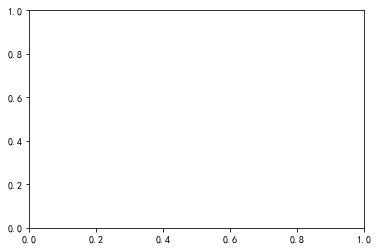

In [98]:
fig_jjj,ax_jjj=plt.subplots()

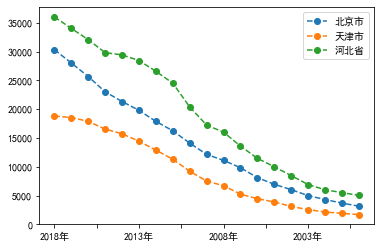

In [99]:
#ax_jjj.cla()
jjjgdp.plot(ax=ax_jjj,style='--o')  
#df.plot()画图时，可以将已有的子图赋值给其ax属性，这样画图就会画到已有的子图里，便于后续修改
fig_jjj

DataFrame在画图时，默认是以每一列为一个分类，index为横轴，数值为纵轴

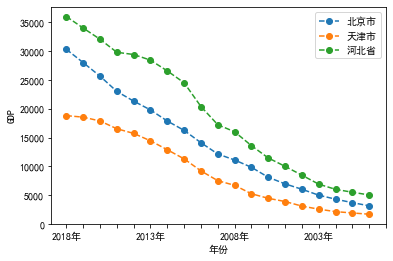

In [100]:
ax_jjj.set_xlabel('年份')
ax_jjj.set_ylabel('GDP')
ax_jjj.set_xticks(np.arange(0,20,1))
fig_jjj

In [101]:
fig_jjj.savefig('line.jpg', bbox_inches = 'tight') 

### 5.2 柱状图

**绘制分类的柱状图，可以避免像之前那样设置柱的宽度了**

<AxesSubplot:>

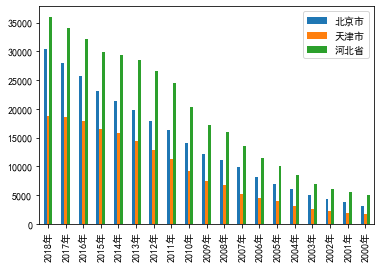

In [102]:
fig_bar1,ax_bar1=plt.subplots()
jjjgdp.plot.bar(ax=ax_bar1)

In [103]:
fig_bar1.savefig('bar1.jpg', bbox_inches = 'tight')

<AxesSubplot:>

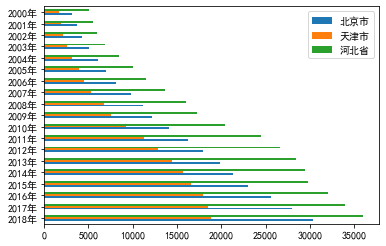

In [104]:
fig_bar2,ax_bar2=plt.subplots()
jjjgdp.plot.barh(ax=ax_bar2)  #barh的h即把方向调到horizon，横向

In [105]:
fig_bar2.savefig('bar2.jpg', bbox_inches = 'tight')

还可以把每一类都各自画到一个独立的子图里，省的挤在一起。例如：画出三个省分开的图
![多个子图的bar图](bar3.jpg)

C:\Users\GeWang\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  plot_obj.generate()


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

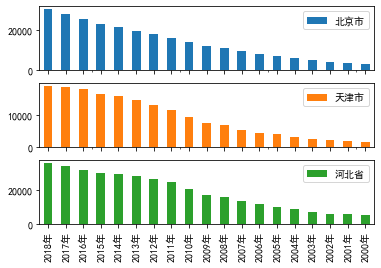

In [106]:
fig_bar3,ax_bar3=plt.subplots(3,1)
#jjjgdp.plot.bar(ax=ax_bar3,subplots=True)  #subplots=True可以把每一列作为一个子图分开画
#jjjgdp.plot.bar(ax=ax_bar3,subplots=True,sharex=True)  #sharex=True 可以让这3个纵向排列的图共用一个横轴
jjjgdp.plot.bar(ax=ax_bar3,subplots=True,sharex=True,title=['','','']) #title可以给三个子图加标题，加空标题即可起到去掉标题的作用

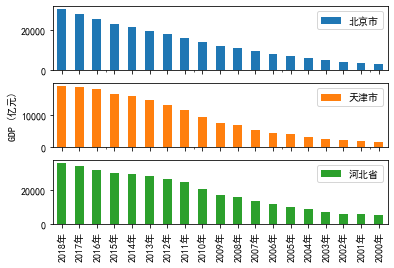

In [107]:
ax_bar3[1].set_ylabel('GDP (亿元)')  #每个子图都可以做进一步修改
fig_bar3

In [108]:
fig_bar3.savefig('bar3.jpg', bbox_inches = 'tight')